In [ ]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import cluster, datasets
import warnings; warnings.simplefilter('ignore')

In [ ]:
#Import data
df = pd.read_csv('https://raw.githubusercontent.com/rizkyazriel/FlipClass-Data-Mining-2/main/Data%20Flip%20Class%202.csv')

In [ ]:
N, P = df.shape
print(f"Baris: {N}, kolom: {P}")

Baris: 200, kolom: 10


In [ ]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
195,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
196,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
197,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
198,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


##Preprocessing Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Jenis Kelamin         196 non-null    object 
 2   Umur                  200 non-null    object 
 3   Pendapatan-per-bulan  200 non-null    int64  
 4   skor-pengeluaran      200 non-null    int64  
 5   Menikah               188 non-null    object 
 6   Kota                  200 non-null    object 
 7   Promo                 194 non-null    float64
 8   HariFav               200 non-null    object 
 9   FavFlavor             200 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 15.8+ KB


In [ ]:
df['Kota'] = df['Kota'].replace('JJakarta', 'Jakarta')

In [ ]:
df['Kota'].value_counts()

Jakarta      88
Depok        59
Tangerang    53
Name: Kota, dtype: int64

In [ ]:
df['Kota'] = df['Kota'].astype('category')

In [ ]:
df['FavFlavor'].value_counts()

0    40
2    20
6    20
3    20
7    20
5    20
4    20
1    20
8    19
9     1
Name: FavFlavor, dtype: int64

In [ ]:
df['FavFlavor'] = df['FavFlavor'].replace(9, 8)

In [ ]:
df['Promo'] = df['Promo'].replace(5.0, 1.0)

In [ ]:
df['Jenis Kelamin'] = df['Jenis Kelamin'].replace('-', 'Pria')

In [ ]:
df['Umur'] = df['Umur'].replace("35'", 35)

In [ ]:
df['Menikah'].value_counts()

1    160
0     26
       1
-      1
Name: Menikah, dtype: int64

In [ ]:
df['Menikah'] = df['Menikah'].replace("", 1)
df['Menikah'] = df['Menikah'].replace(" ", 1)
df['Menikah'] = df['Menikah'].replace("-", 1)

In [ ]:
df['Umur'] = pd.to_numeric(df['Umur'])

In [ ]:
df['Menikah'] = pd.to_numeric(df['Menikah'])
df['Menikah'] = df['Menikah'].astype('Int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID                    200 non-null    int64   
 1   Jenis Kelamin         196 non-null    object  
 2   Umur                  200 non-null    int64   
 3   Pendapatan-per-bulan  200 non-null    int64   
 4   skor-pengeluaran      200 non-null    int64   
 5   Menikah               188 non-null    Int64   
 6   Kota                  200 non-null    category
 7   Promo                 194 non-null    float64 
 8   HariFav               200 non-null    object  
 9   FavFlavor             200 non-null    int64   
dtypes: Int64(1), category(1), float64(1), int64(5), object(2)
memory usage: 14.7+ KB


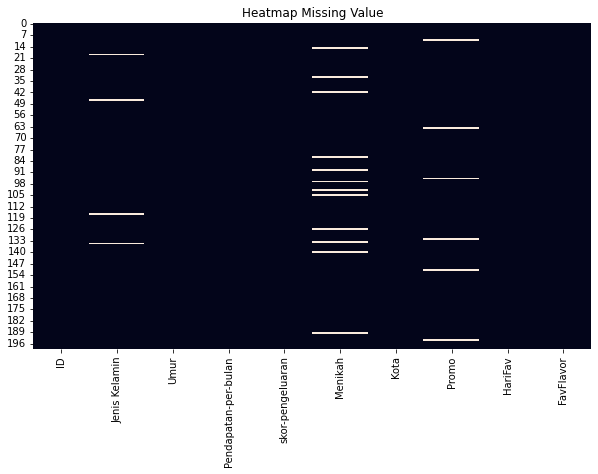

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

In [ ]:
df[['Jenis Kelamin', 'Menikah', 'Promo']].isnull().sum()

Jenis Kelamin     4
Menikah          12
Promo             6
dtype: int64

In [ ]:
df.fillna(method='ffill', axis=0, inplace=True)

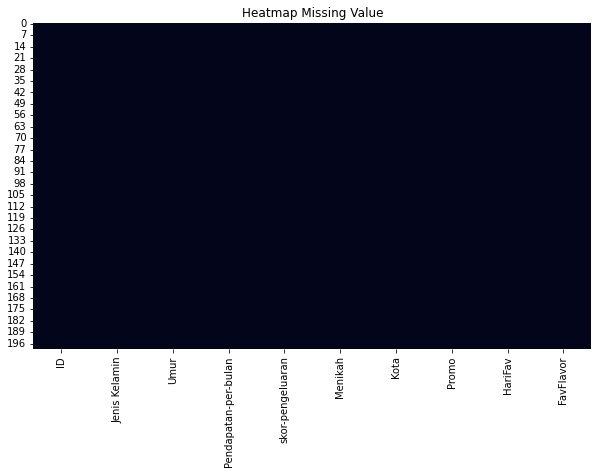

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Heatmap Missing Value')
plt.show()

## EDA

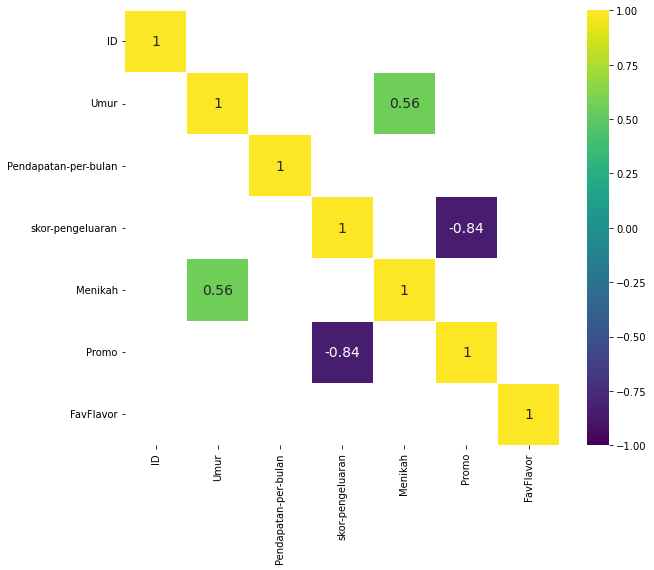

In [ ]:
corr2 = df.corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(corr2[(corr2 >= 0.5) | (corr2 <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 14}, square=True);

Dari heatmap di atas, ternyata korelasi yang paling tinggi adalah antara menikah dengan umur. Hal ini berarti bahwa 

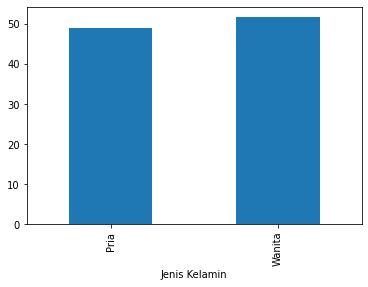

In [ ]:
plotJK = df.groupby(['Jenis Kelamin']).mean()['skor-pengeluaran']
plotJK.plot.bar()
plt.show()

Berdasarkan histogram diatas diketahui bahwa jenis kelamin wanita lebih banyak pengeluaran dibandingkan jenis kelamin pria


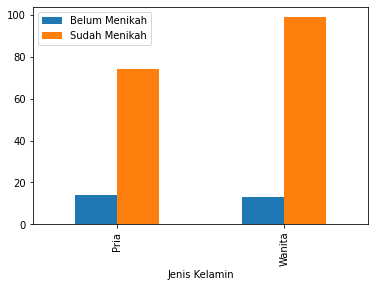

In [ ]:
df.groupby(['Jenis Kelamin','Menikah']).size().unstack(fill_value=0).plot.bar()
plt.legend(['Belum Menikah', 'Sudah Menikah'])
plt.show()

Berdasarkan histogram diatas diketahui bahwa lebih banyak pria dan wanita yang sudah menikah dibandingkan yang belum menikah

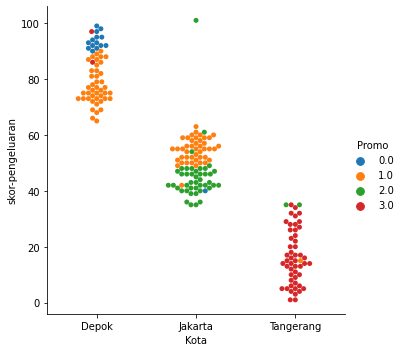

In [ ]:
p1 = sns.catplot(x='Kota', y='skor-pengeluaran', hue='Promo', kind='swarm', data=df)

Berdasarkan plot diatas diketahui bahwa kota Tangerang memiliki skor pengeluaran yang paling terkecil dan banyak pengunjung yang menggunakan promo, kota Depok memiliki skor pengeluaran yang paling tertinggi dan banyak pengunjung yang jarang bahkan tidak pernah menggunakan promo, sedangkan kota Jakarta memiliki skor pengeluaran yang menengah dan jarang menggunakan promo.

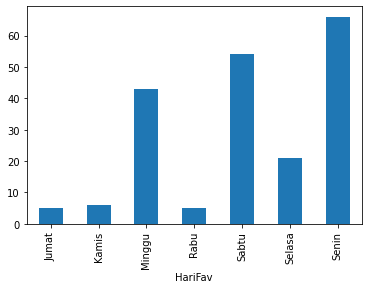

In [ ]:
plotJK = df.groupby(['HariFav']).count()['Promo']
plotJK.plot.bar()
plt.show()

Dari histogram diatas diketahui bahwa penggunaan promo lebih sering digunakan pada hari senin

In [ ]:
CT = pd.crosstab(index=df['FavFlavor'], columns=df['Jenis Kelamin'])
CT

Jenis Kelamin,Pria,Wanita
FavFlavor,,
0,22,18
1,9,11
2,6,14
3,8,12
4,7,13
5,12,8
6,9,11
7,7,13
8,8,12


Diketahui dari data diatas bahwa rasa yang paling favorit bagi pria dan wanita adalah vanila

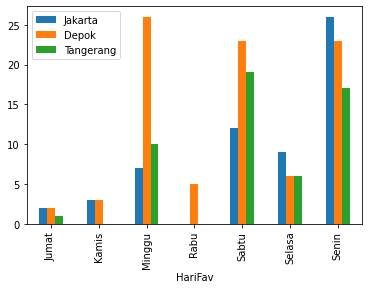

In [ ]:
df.groupby(['HariFav','Kota']).size().unstack(fill_value=0).plot.bar()
plt.legend(['Jakarta', 'Depok', 'Tangerang', ])
plt.show()

Berdasarkan histogram di atas, terlihat hasil dari hari favorit untuk daerah Jakarta, Depok, dan Tangerang. Untuk Daerah Tangerang banyak dari pengunjung mixue memilih hari Sabtu sebagai hari favorit, sedangkan untuk daerah Jakarta banyak pengunjung mixue memilih hari Senin sebagai hari favorit, serta untuk daerah Depok banyak pengunjung mixue memilih hari Minggu sebagai hari favorit.

Selain itu, dari hasil histogram di atas, terlihat bahwa pengunjung mixue dari daerah Jakarta dan Tangerang tidak memilih hari rabu sebagai hari favorit hanya sedikit pengunjung dari daerah Depok yang memilih hari rabu sebagai hari favorit. Kemudian, dari histogram juga kita tahu bahwa dari ketiga kota tersebut sangat banyak pengunjung mixue yang memilih hari Senin sebagai hari favorit .



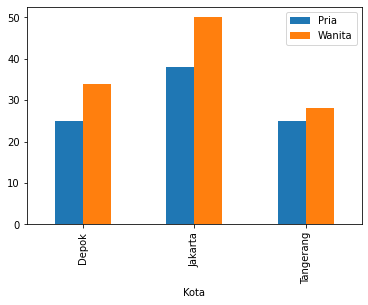

In [ ]:
df.groupby(['Kota','Jenis Kelamin']).size().unstack(fill_value=0).plot.bar()
plt.legend(['Pria', 'Wanita'])
plt.show()

Dari hasil output di atas, terlihat banyaknya pengunjung yang berjenis kelamin pria dan wanita untuk daerah Depok, Tangerang, dan Jakarta. Dari ketiga daerah tersebut lebih banyak pengunjung wanita dibandingkan pria. 

In [ ]:
df.groupby(['Jenis Kelamin','Promo']).size().unstack(fill_value=0).plot.bar()
plt.legend(['0.0', '1.0', '2.0', '3.0'])
plt.show()

Dari hasil output di atas, terlihat bahwa kecenderungan wanita lebih banyak menggunakan promo dibandingkan dengan pria.  

## Segmentasi

In [ ]:
X = df[['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']]

In [ ]:
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

In [ ]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k=3
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = 0)
kmPP.fit(X)
C_kmpp = kmPP.predict(X)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

In [ ]:


X['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

#Kesimpulan

Berdasarkan hasil dari visualisasi dan clustering yang telah kami lakukan, didapatkan :
1. Wanita lebih banyak pengeluaran dibandingan pria
2. Pria dan wanita yang sudah menikah lebih banyak dibandingkan yang belum menikah
3. Kota Depok memiliki skor pengeluaran tertinggi dan banyak pengunjung yang jarang bahkan tidak pernah memakai promo
4. Penggunaan promo lebih sering digunakan di hari senin
5. Rasa yang paling favorit bagi pria dan wanita adalah rasa vanila
6. Hari senin menjadi hari favorit karena dari 3 kota yaitu Tangerang, Depok, dan Jakarta paling banyak didatangi pengunjung adalah hari senin
7. Pengunjung wanita lebih banyak dari pada pengunjung pria
8. Wanita lebih sering menggunakan promo dibandingkan pria

Dari hal-hal yang telah kita dapat diatas bisa ditarik kesimpulan